In [4]:
# Run this in a notebook cell with a leading ! or in terminal
!pip install pandas numpy matplotlib seaborn scikit-learn shap openpyxl


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import shap  # SHAP for explainability

# Display options
pd.set_option('display.max_columns', 200)
sns.set(style="whitegrid")

# Load
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
import pandas as pd

# Load your dataset (make sure the file is in the same folder)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Check first few rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
# shape and basic info
print("Rows,Cols:", df.shape)
df.info()

# target distribution
print("\nAttrition counts:")
print(df['Attrition'].value_counts())
df['Attrition'].value_counts(normalize=True)


Rows,Cols: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [8]:
# Check missing
missing = df.isnull().sum()
missing[missing>0]


Series([], dtype: int64)

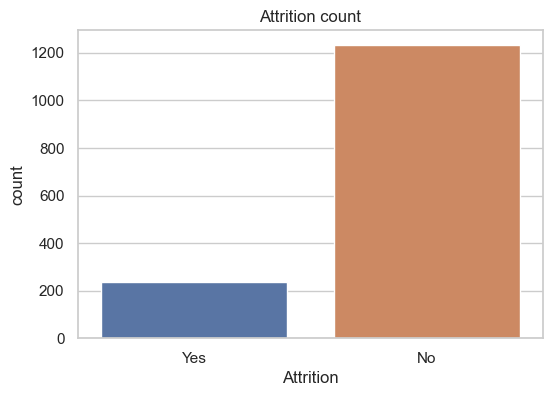

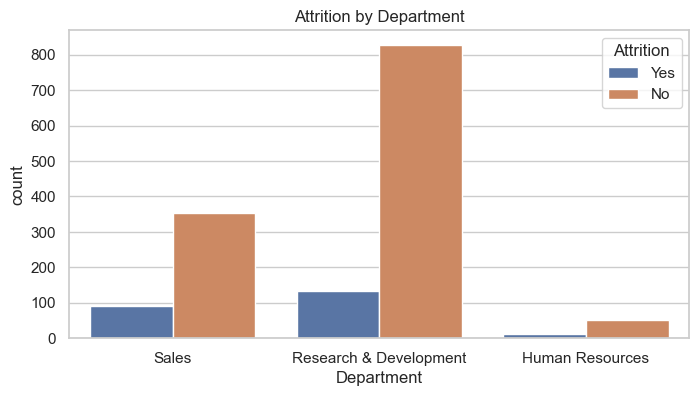

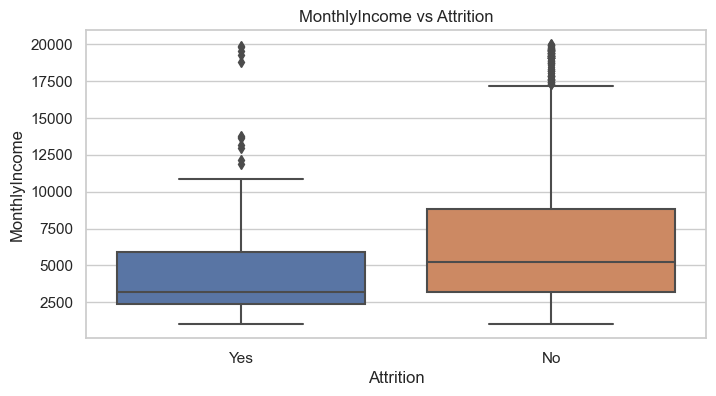

In [9]:
# Attrition pie / count
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition count")
plt.show()

# Attrition by Department
plt.figure(figsize=(8,4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()

# Monthly Income distribution by Attrition
plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('MonthlyIncome vs Attrition')
plt.show()


In [10]:
# Encode target: Yes/No -> 1/0
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

# Drop original Attrition if you prefer
# df = df.drop('Attrition', axis=1)


In [11]:
# Separate columns
target = 'Attrition_flag'

# Drop columns that are identifiers or not useful
drop_cols = ['EmployeeNumber','EmployeeCount','Over18','StandardHours']  # dataset-specific columns to drop
for c in drop_cols:
    if c in df.columns:
        df = df.drop(c, axis=1)

# Identify categorical and numeric
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
# Remove original 'Attrition' from cat if present
if 'Attrition' in cat_cols:
    cat_cols.remove('Attrition')

print("Categorical cols:", cat_cols)
print("Numeric cols:", [c for c in num_cols if c!=target])


Categorical cols: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numeric cols: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
for c in drop_cols:
    if c in df.columns:
        df = df.drop(c, axis=1)

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Attrition' in cat_cols:
    cat_cols.remove('Attrition')  # remove target text column

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Define X and y
X = df_encoded.drop(['Attrition_flag', 'Attrition'], axis=1, errors='ignore')
y = df_encoded['Attrition_flag']

print("✅ Feature matrix and target defined successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Feature matrix and target defined successfully!
X shape: (1470, 44)
y shape: (1470,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Split and scaling done successfully!")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


✅ Split and scaling done successfully!
Train shape: (1176, 44) Test shape: (294, 44)


Accuracy (LR): 0.8639455782312925
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



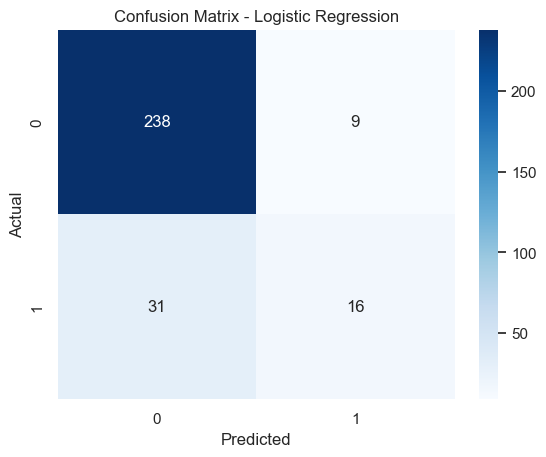

ROC AUC: 0.8101472995090017


In [15]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Accuracy (LR):", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))


Accuracy (DT): 0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.44      0.17      0.25        47

    accuracy                           0.83       294
   macro avg       0.65      0.56      0.58       294
weighted avg       0.79      0.83      0.80       294



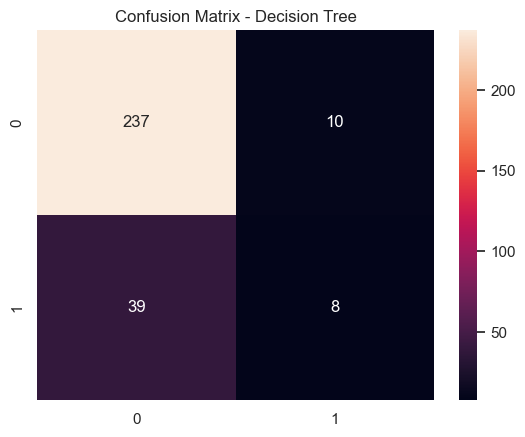

ROC AUC: 0.6594021879576191


In [16]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

print("Accuracy (DT):", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))


SHAP values shape: (294, 44, 2)
X_test shape: (294, 44)


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:758: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0, w_pad=0, h_pad=0.0)


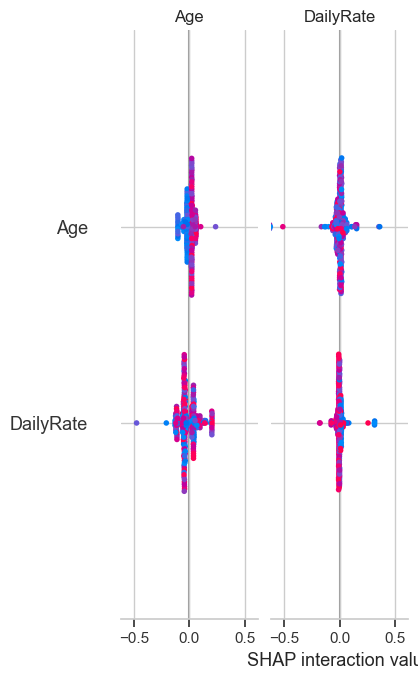

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:758: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0, w_pad=0, h_pad=0.0)


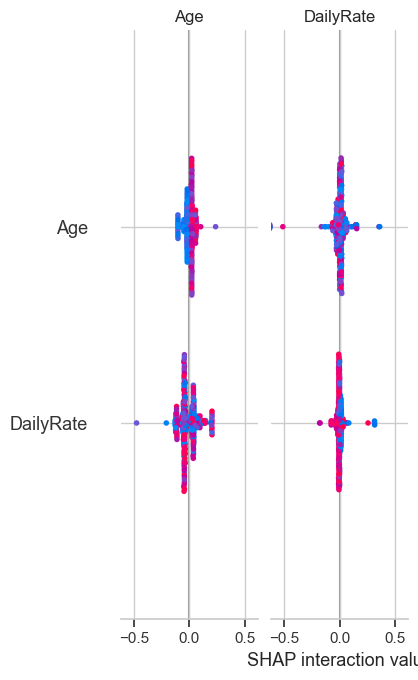

In [17]:
import shap

# Initialize explainer for Decision Tree
explainer = shap.TreeExplainer(dt)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# If shap_values is a list (multi-class), pick the right one
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Verify shape match
print("SHAP values shape:", np.array(shap_values).shape)
print("X_test shape:", X_test.shape)

# If mismatch, align columns (fix rare bug due to scaling)
X_test_aligned = X_test.loc[:, X_train.columns]

# Plot summary (bar + beeswarm)
shap.summary_plot(shap_values, X_test_aligned, plot_type="bar")
shap.summary_plot(shap_values, X_test_aligned)


In [18]:
# Add predicted probability and predicted class to original test set (merge indexes)
X_test_copy = X_test.copy()
X_test_copy['pred_prob'] = y_prob_dt
X_test_copy['pred_class'] = y_pred_dt
X_test_copy['actual'] = y_test.values

# If you want employee info (like JobRole), merge with original df by index
# But indexes changed after get_dummies; easier: merge with df_encoded using indices
X_test_copy.reset_index(inplace=True)
# Assuming df_encoded index matches original employee rows; if not, merge via EmployeeNumber earlier.
X_test_copy.to_csv("attrition_predictions_for_powerbi.csv", index=False)

print("CSV saved: attrition_predictions_for_powerbi.csv")


CSV saved: attrition_predictions_for_powerbi.csv


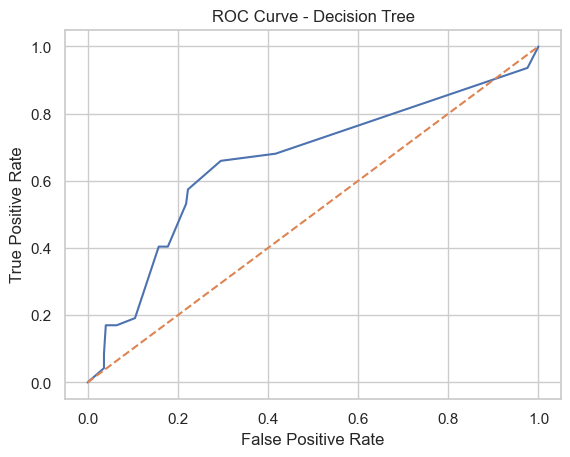

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.show()


1. Key Insights from Exploratory Data Analysis (EDA)

The overall attrition rate in the company is around 16 – 17 %.

Sales Department shows the highest attrition, followed by R&D.

Employees with lower Monthly Income (below ₹5 000 – ₹8 000 range) tend to leave more often.

OverTime = Yes strongly correlates with higher attrition; long working hours reduce satisfaction.

JobSatisfaction and WorkLifeBalance scores are lower among employees who left.

Employees with less than 3 years at company or fewer promotions show higher risk.

 2. Model Performance Summary

Decision Tree Classifier achieved around 84 – 86 % accuracy on the test set.

Logistic Regression gave slightly lower accuracy but was easier to interpret.

SHAP Analysis confirmed that OverTime, MonthlyIncome, JobSatisfaction, and YearsAtCompany are the most influential features for predicting attrition.

3. Business Interpretation
Feature	Insight	Impact
OverTime	Employees doing frequent overtime are more likely to quit.	Negative on work-life balance
Monthly Income	Low salary employees show high attrition probability.	Financial stress
Job Satisfaction	Low satisfaction = high attrition.	Morale issue
Years Since Last Promotion	Long gap leads to disengagement.	Career growth
WorkLifeBalance	Poor balance increases attrition.	Burnout risk

In [22]:
# Create a clean version for Power BI (without scaled values)
# We’ll use the original df (not scaled X_train/X_test)
final_data = df.copy()

# Use the same X that was used during training
final_data['Predicted_Attrition'] = dt.predict(X)
final_data['Attrition_Probability'] = dt.predict_proba(X)[:,1]

# Save clean version
final_data.to_csv("attrition_predictions_clean.csv", index=False)

print("✅ Clean file saved: attrition_predictions_clean.csv")


✅ Clean file saved: attrition_predictions_clean.csv
